# Machine Learning - Agrupamento/Cluterização

O agrupamento ou clusterização é um tipo de aprendizado de máquina não supervisionado, que como o próprio nome sugere é responsável por separar os dados de uma análise em diferentes grupos da melhor maneira possível.

## Método K-Means

Funcionamento:

    1 - Primeiro, preciso definir um ‘K’, ou seja, um número de clusters (ou agrupamentos).
    2 - Depois, preciso definir, aleatoriamente, um centroide para cada cluster.
    3 - O próximo passo é calcular, para cada ponto, o centroide de menor distância. Cada ponto pertencerá ao centroide mais próximo (lembrar do exemplo do CD logístico e das lojas: cada loja (ponto) deve ser atendida pelo CD (centróide) mais próximo)
    4 - Agora, devo reposicionar o centróide. A nova posição do centroide deve ser a média da posição de todos os pontos do cluster.
    5 - Os dois ultimos passos são repetidos, iterativamente, até obtermos a posição ideal dos centróides.

<img src="kmeans.jpg" style=width:500px;height:400px/>

## Exemplo 1

### Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score

### Criação dos dados

In [3]:
# Criando dados usando a função make blobs (Parametros são: n° de amostras, n° de características, n° de centros,
# espalhamento dos dados, e embaralhamento dos dados)

# samples = amostra; features = x e y (pontos); centers = grupos; 
data, labels = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=0.5, shuffle=True)


print(data)

[[ 2.44964035  8.76759364]
 [ 5.68441131  8.06780253]
 [ 3.06718776  9.82200105]
 [-3.55730962 -5.06498031]
 [ 1.79062786  9.25193702]
 [-3.60334488 -4.19038262]
 [-3.64709158 -4.85088972]
 [-3.42856946 -3.23737693]
 [ 5.44597088  8.44616626]
 [-3.34404928 -4.25096543]
 [-3.02664653 -4.66504946]
 [ 5.6879267   7.41285518]
 [ 2.77321747  9.50832604]
 [ 2.60599113  9.88692158]
 [-3.18575305 -5.14940693]
 [ 3.39682677  9.13269695]
 [ 5.34687076  8.24870154]
 [ 2.21215836 10.1554605 ]
 [ 4.84426495  7.35338733]
 [-4.6147928  -3.89403913]
 [ 2.10023602 10.20185593]
 [ 4.45750912  9.27062635]
 [ 2.20803819  9.39357544]
 [ 5.21448546  9.48692437]
 [ 2.42615352 10.23619507]
 [-3.7723835  -3.96998878]
 [ 3.06049502  9.54246757]
 [-3.85812352 -4.09536246]
 [ 2.15211224  9.81549047]
 [-3.64998128 -5.16619706]
 [ 5.37307646  8.99129145]
 [ 2.66902984  9.24974111]
 [ 4.24997787  8.80074261]
 [-3.45462807 -5.30829044]
 [ 4.62994238  8.20393243]
 [ 2.02907991  8.63661325]
 [ 5.16930907  8.3447894 ]
 

### Análise exploratória

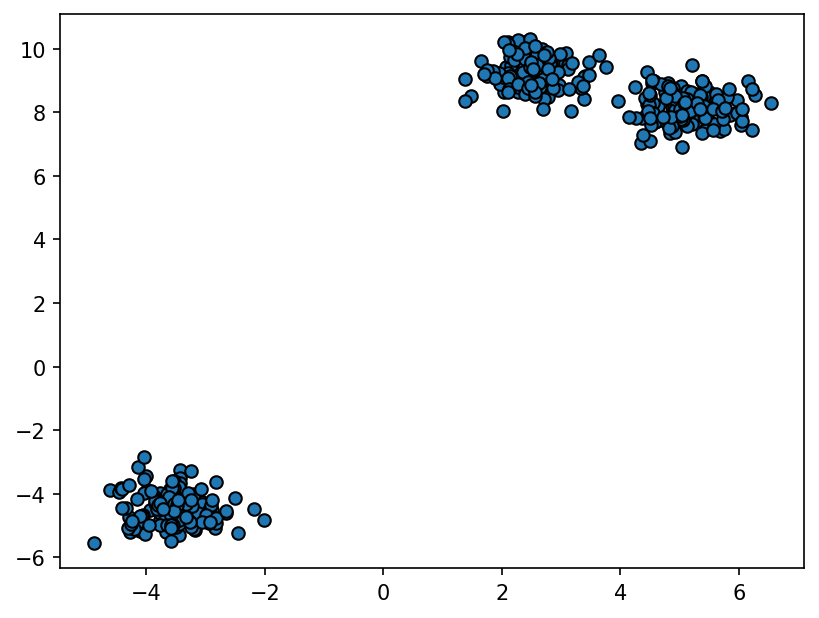

In [4]:
plt.rcParams['figure.dpi'] = 150
plt.scatter(data[:, 0], data[:, 1], marker="o", edgecolors="black")
plt.show()

### Criação do KMeans

In [5]:
# Instanciando um modelo KMeans e passando os dados gerados para treinamento
modelo = KMeans(n_clusters=3)
modelo.fit(data)

C:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

### Predição

In [6]:
# Prevendo os valores dos dados
resposta = modelo.predict(data)

# Separando os grupos de acordo com o que o modelo previu
grupo_1 = data[resposta == 0]
grupo_2 = data[resposta == 1]
grupo_3 = data[resposta == 2]
centros = modelo.cluster_centers_

### Plotando o gráfico

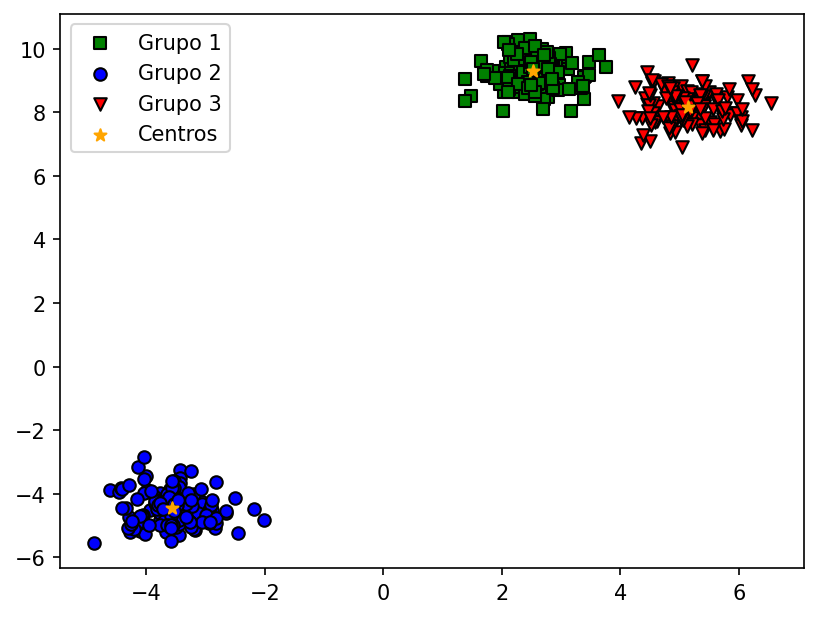

In [7]:
plt.scatter(grupo_1[:, 0], grupo_1[:, 1], c="green", marker="s", label="Grupo 1", edgecolors="black")
plt.scatter(grupo_2[:, 0], grupo_2[:, 1], c="blue", marker="o", label="Grupo 2", edgecolors="black")
plt.scatter(grupo_3[:, 0], grupo_3[:, 1], c="red", marker="v", label="Grupo 3", edgecolors="black")
plt.scatter(centros[:, 0], centros[:, 1], c="orange", label="Centros", marker="*")

plt.legend(scatterpoints=1)

plt.show()

### Avaliações

### Índice Calinski Harabasz

O índice CH (também conhecido como critério de razão de variância ) é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). Aqui, a coesão é estimada com base nas distâncias dos pontos de dados em um cluster ao seu centróide do cluster e a separação é baseada na distância dos centróides do cluster do centróide global. (Quanro maior o valor, melhor foi a divisão).

### Silhouette Score

Varia entre -1 e 1 de nos mostra o quão bem os elementos estão agrupados levando em conta algumas definições matemáticas. (Quanto mais próximo de 1, melhor foi a divisão).

In [8]:
# Avaliando o modelo dentro dos dois métodos de avaliação, passando os dados e os labels obtidos no treinamento como parametro
print("CH: ", calinski_harabasz_score(data, modelo.labels_))
print("SC: ", silhouette_score(data, modelo.labels_))

CH:  21360.356255249015
SC:  0.7769091109427868


## Exemplo 2

### Importando os dados

In [9]:
# Importando o csv
#o python entende que a coluna é separado por ponto e virgula
data2 = pd.read_csv("clustering_data.csv", sep=";")
data2.head()


,f1,f2
0,0.018637,8.964998
1,-5.737664,-1.860687
2,-4.195087,-4.641740
3,8.021220,-4.016667
4,-1.403076,5.093363


### Análise exploratória

### Verificando a presença de elementos nulos e excluindo-os

In [10]:
#Mostrando o total de dados
print("total anterior: ", len(data2))

#Verificando a presença de dados nulos
display(data2.isna().any())

#Excluindo os dados nulos
data2 = data2.dropna()

#Mostrando o total de dados novamente
print("total final: ", len(data2))


total anterior:  2297


f1    True
f2    True
dtype: bool

total final:  1703


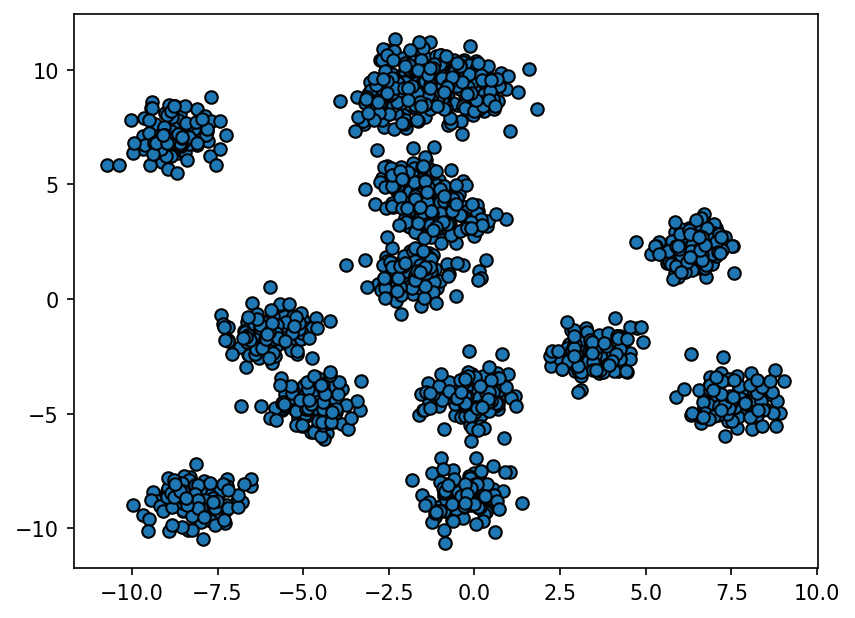

In [11]:
plt.rcParams['figure.dpi'] = 150
plt.scatter(data2["f1"], data2["f2"], marker="o", edgecolor="black")
plt.show()

### Elbow Method

Método onde treinamos nosso modelo com diferentes números de clusters possíveis e posteriormente analisamos qual o número ideal. Número esse que é definido pelo ponto onde a reta do gráfico começa a se tornar constante.

In [12]:
# Todos dados são para treino
# Transformando em array do numpy
x = np.array(data2)
print(x)

[[ 0.01863667  8.96499819]
 [-5.737664   -1.86068695]
 [-4.19508688 -4.6417399 ]
 ...
 [-7.30031466 -9.62081282]
 [-0.54031681  4.13978919]
 [-1.38781658  4.66333865]]


In [17]:
# Testando a diferentes números possíveis de clusters entre 1 e 20, avaliando-os, e salvando as avaliações em uma lista
distortion = []
for i in range (1, 21):
    km = KMeans(n_clusters=i)
    km.fit(x)
    metrica = km.inertia_
    distortion.append(metrica)

C:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

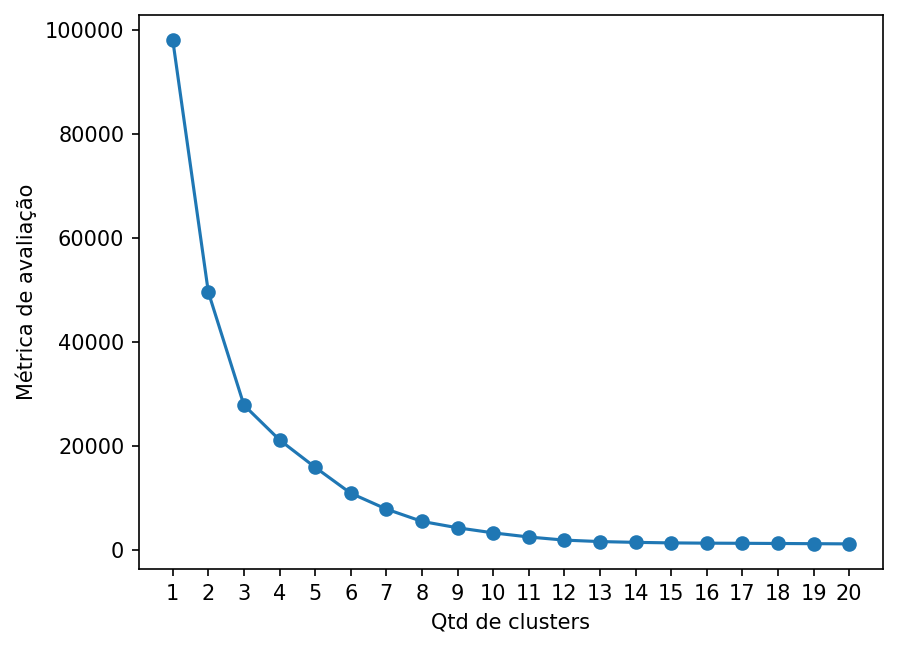

In [16]:
# Plotando o gráfico
plt.plot(range(1,21), distortion, marker='o')
plt.xlabel("Qtd de clusters")
plt.ylabel("Métrica de avaliação")
plt.xticks(range(1,21))
plt.show()

### Criando o KMeans

In [29]:
# Instanciando o modelo
modelo2 = KMeans(n_clusters=12)
modelo2.fit(x)


C:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12)

### Predição

In [30]:
# Prevendo os valores
resposta2 = modelo2.predict(x)

### Mostrando Gráfico

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

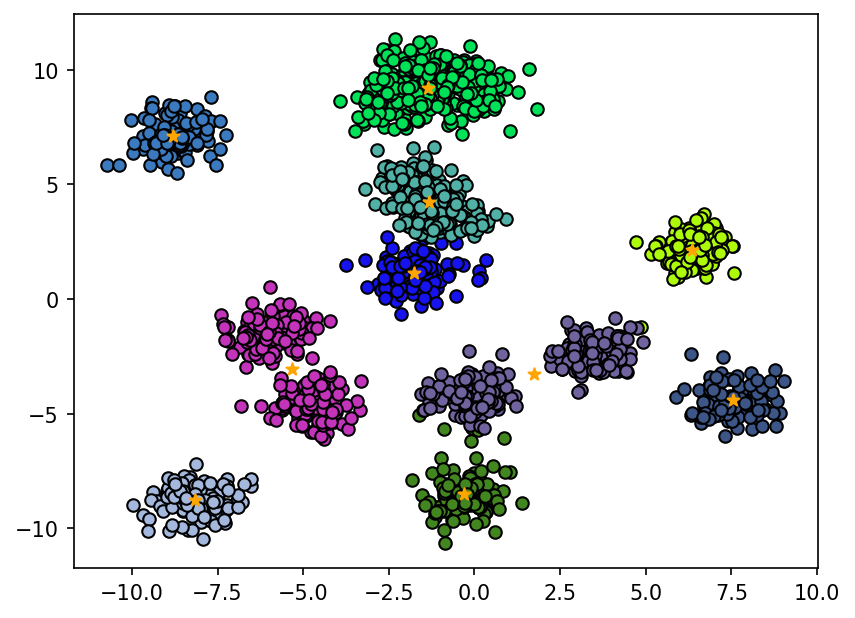

In [27]:
centros2 = modelo2.cluster_centers_

for i in range(12):
    grupo_i = x[resposta2 == i]
    plt.scatter(grupo_i[:,0] ,grupo_i[:,1], c=np.random.rand(3), edgecolors=("black") )
    
plt.scatter(centros2[:, 0], centros2[:, 1], c="orange", label="Centros", marker="*")
plt.show()

In [31]:
# Avaliando o modelo dentro dos dois métodos de avaliação, passando os dados e os labels obtidos no treinamento como parametro
print("CH: ", calinski_harabasz_score(data2, modelo2.labels_))
print("SC: ", silhouette_score(data2, modelo2.labels_))

CH:  8048.739914751514
SC:  0.6871672912542712
